<a href="https://colab.research.google.com/github/sunnyiuww/MSIB-PBL/blob/main/MSIB7_PBL_(imputasi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import plotly.express as px
from IPython.display import display
import plotly.graph_objects as go

#**DATA UNDERSTANDING**

##**Collect Initial Data**

In [ ]:
# Correct raw URL for the CSV file
url = "https://github.com/sunnyiuww/MSIB-PBL/blob/main/Online%20Budget%20Hotel%20Dataset.xlsx?raw=true"
# df = pd.read_excel(url)

# Baca data dari setiap sheet secara spesifik
bookings_df = pd.read_excel(url, sheet_name="Bookings Table")
user_df = pd.read_excel(url, sheet_name="User Table")
property_df = pd.read_excel(url, sheet_name="Property Table")

# Tampilkan beberapa baris pertama dari setiap sheet
display(bookings_df.head())
display(user_df.head())
display(property_df.head())

,BOOKING_ID,USER_ID,PROPERTY_CODE,BOOKING_DATE,CHECK_IN_DATE,CHECK_OUT_DATE,ROOMS,NIGHTS,ROOM_NIGHTS,REVENUE_DOLLAR
0,942481721995472,2382984,MAL0084,2024-04-19,2024-04-19,2024-04-20,2,1,2,15.03
1,859896400600792,8922581,SUR0320,2024-07-21,2024-07-22,2024-07-23,3,1,3,14.85
2,863313142099180,11027905,SUR0381,2021-05-29,2021-06-05,2021-06-06,1,1,1,17.88
3,815705055066134,6964446,BAN0082,2022-03-31,2022-04-05,2022-04-07,1,3,3,27.92
4,257574986800513,1387674,BAN0482,2021-06-08,2021-06-14,2021-06-17,1,2,2,22.57


,USER_ID,USER_TYPE,USER_GENDER,TRAVEL_PURPOSE,USER_AGE
0,9860949,New User,Female,Business,47
1,14615261,New User,Female,Leisure,28
2,7663712,New User,Female,Leisure,56
3,14003021,Repeat User,Male,Leisure,20
4,9689090,New User,Male,Leisure,33


,PROPERTY_CODE,CITY,DISTRICT,COHORT_DATE,BRAND_TYPE,INVENTORY
0,YOG0000,Yogyakarta,Central,2022-04-12,Koolkost,31
1,MAL0001,Malang,North,2023-12-31,RedDoorz,80
2,BAN0002,Bandung,East,2020-06-11,RedPartner,58
3,SUR0003,Surabaya,North,2024-05-02,RedDoorz,95
4,JAK0004,Jakarta,West,2024-05-30,RedDoorz,72


**Penjelasan Kode:**  
Kode ini digunakan untuk membaca file Excel dari URL yang di-host di GitHub, kemudian memuat data dari tiga sheet berbeda:  
1. **"Bookings Table"**: Berisi data pemesanan hotel.  
2. **"User Table"**: Berisi data pengguna.  
3. **"Property Table"**: Berisi data properti hotel.  

Setelah memuat data, kode akan menampilkan beberapa baris pertama dari setiap sheet untuk memberikan gambaran isi dataset.

---
**Outputnya:**  
1. **Bookings Table**: Data tentang pemesanan, seperti ID pemesanan, pengguna, properti, tanggal check-in, jumlah kamar, dan pendapatan.   

2. **User Table**: Informasi tentang pengguna, seperti jenis pengguna, gender, tujuan perjalanan, dan usia.  

3. **Property Table**: Detail properti, termasuk kode properti, lokasi, jenis brand, dan total kamar.    

Output ini digunakan sebagai gambaran awal untuk analisis lebih lanjut.

##**Describe Data**

Informasi Dasar

In [ ]:
# Tampilkan ukuran (shape) dari setiap sheet
print("Informasi Bookings Table:", bookings_df.shape)
print("Informasi User Table:", user_df.shape)
print("Informasi Property Table:", property_df.shape)

Informasi Bookings Table: (100000, 10)
Informasi User Table: (1000, 5)
Informasi Property Table: (500, 6)


Dataset ini memiliki beberapa sheet dengan informasi dasar sebagai berikut:

1. Bookings Table: (100000, 10)

*   Tabel ini memiliki 100.000 baris dan 10 kolom.
*   Data ini berisi informasi tentang setiap pemesanan atau reservasi di platform hotel, dengan kolom yang mencakup detail seperti tanggal pemesanan, durasi menginap, harga, dan lain-lain.


2. User Table: (1000, 5)

* Tabel ini memiliki 1.000 baris dan 5 kolom.
* Setiap baris merepresentasikan informasi tentang seorang pengguna atau pelanggan, seperti ID pengguna dan data terkait lainnya.

3. Property Table: (500, 6)
* Tabel ini memiliki 500 baris dan 6 kolom.
* Setiap baris di tabel ini mewakili sebuah properti (hotel atau tempat penginapan) yang terdaftar di platform. Kolomnya mungkin berisi informasi seperti kode properti, lokasi dan data terkait lainnya.

Informasi Lanjutan

In [ ]:
print("Informasi Lanjutan Bookings Table:")
bookings_df.info()
print("\n" + "-"*50 + "\n")

print("Informasi Lanjutan User Table:")
user_df.info()
print("\n" + "-"*50 + "\n")

print("Informasi Lanjutan Property Table:")
property_df.info()
print("\n" + "-"*50 + "\n")

Informasi Lanjutan Bookings Table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   BOOKING_ID      100000 non-null  int64         
 1   USER_ID         100000 non-null  int64         
 2   PROPERTY_CODE   100000 non-null  object        
 3   BOOKING_DATE    100000 non-null  datetime64[ns]
 4   CHECK_IN_DATE   100000 non-null  datetime64[ns]
 5   CHECK_OUT_DATE  100000 non-null  datetime64[ns]
 6   ROOMS           100000 non-null  int64         
 7   NIGHTS          100000 non-null  int64         
 8   ROOM_NIGHTS     100000 non-null  int64         
 9   REVENUE_DOLLAR  100000 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(5), object(1)
memory usage: 7.6+ MB

--------------------------------------------------

Informasi Lanjutan User Table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000

Kode ini digunakan untuk menampilkan informasi mendetail tentang struktur setiap DataFrame dari tiga sheet Excel: Bookings Table, User Table, dan Property Table. Fungsi info() memberikan gambaran tentang kolom-kolom dalam DataFrame, seperti jumlah baris, tipe data, dan jumlah nilai non-null (bukan NaN).

Informasi Statistik Deskriptif

In [ ]:
# Tampilkan deskripsi statistik dari setiap sheet menggunakan display
display(bookings_df.describe())
display(user_df.describe())
display(property_df.describe())

,BOOKING_ID,USER_ID,BOOKING_DATE,CHECK_IN_DATE,CHECK_OUT_DATE,ROOMS,NIGHTS,ROOM_NIGHTS,REVENUE_DOLLAR
count,1.000000e+05,1.000000e+05,100000,100000,100000,100000.000000,100000.00000,100000.000000,100000.000000
mean,5.504121e+14,8.203039e+06,2022-05-13 10:04:32.448000,2022-05-15 11:12:27.936000,2022-05-17 11:08:00.960000,2.004970,1.99952,4.006390,20.011299
min,1.000065e+14,1.003743e+06,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,1.000000,1.00000,1.000000,10.000000
25%,3.254883e+14,4.750142e+06,2021-03-05 00:00:00,2021-03-07 00:00:00,2021-03-09 00:00:00,1.000000,1.00000,2.000000,15.000000
50%,5.494443e+14,8.502579e+06,2022-05-11 00:00:00,2022-05-14 00:00:00,2022-05-15 00:00:00,2.000000,2.00000,3.000000,20.020000
75%,7.761315e+14,1.158780e+07,2023-07-23 00:00:00,2023-07-25 00:00:00,2023-07-27 00:00:00,3.000000,3.00000,6.000000,25.020000
max,9.999965e+14,1.499736e+07,2024-09-30 00:00:00,2024-10-09 00:00:00,2024-10-12 00:00:00,3.000000,3.00000,9.000000,30.000000
std,2.597225e+14,4.038835e+06,NaN,NaN,NaN,0.816867,0.81679,2.403129,5.779805


,USER_ID,USER_AGE
count,1.000000e+03,1000.000000
mean,8.214200e+06,39.830000
std,4.043905e+06,11.902049
min,1.003743e+06,20.000000
25%,4.755299e+06,29.000000
50%,8.502834e+06,40.000000
75%,1.160628e+07,50.000000
max,1.499736e+07,60.000000


,COHORT_DATE,INVENTORY
count,500,500.000000
mean,2022-04-14 20:44:09.600000,59.668000
min,2019-10-04 00:00:00,20.000000
25%,2020-12-25 12:00:00,39.000000
50%,2022-05-14 00:00:00,59.000000
75%,2023-07-22 12:00:00,81.000000
max,2024-09-28 00:00:00,100.000000
std,NaN,23.254576


Kode ini digunakan untuk menampilkan deskripsi statistik dari setiap DataFrame yang berasal dari tiga sheet Excel. Fungsi describe() di pandas memberikan ringkasan statistik untuk kolom numerik secara default, seperti jumlah data, rata-rata, nilai minimum, maksimum, dan persentil.

## **Verify Data Quality**

Missing Values

In [ ]:
# Tampilkan persentase nilai yang hilang untuk setiap sheet
display(pd.DataFrame(bookings_df.isna().sum() / len(bookings_df) * 100, columns=['Null Ratio %']))
display(pd.DataFrame(user_df.isna().sum() / len(user_df) * 100, columns=['Null Ratio %']))
display(pd.DataFrame(property_df.isna().sum() / len(property_df) * 100, columns=['Null Ratio %']))

,Null Ratio %
BOOKING_ID,0.0
USER_ID,0.0
PROPERTY_CODE,0.0
BOOKING_DATE,0.0
CHECK_IN_DATE,0.0
CHECK_OUT_DATE,0.0
ROOMS,0.0
NIGHTS,0.0
ROOM_NIGHTS,0.0
REVENUE_DOLLAR,0.0


,Null Ratio %
USER_ID,0.0
USER_TYPE,0.0
USER_GENDER,0.0
TRAVEL_PURPOSE,0.0
USER_AGE,0.0


,Null Ratio %
PROPERTY_CODE,0.0
CITY,0.0
DISTRICT,0.0
COHORT_DATE,0.0
BRAND_TYPE,0.0
INVENTORY,0.0


Kode ini digunakan untuk menghitung dan menampilkan persentase **nilai yang hilang (missing values)** di setiap sheet, yang membantu untuk memahami seberapa besar proporsi data yang tidak tersedia (NaN) dalam setiap kolom dari **Bookings Table**, **User Table**, dan **Property Table**.

**Penjelasan Kode**  
1. **`bookings_df.isna().sum()`**  
   - **`isna()`**: Fungsi ini akan menghasilkan DataFrame dengan nilai boolean (True atau False) yang menunjukkan apakah setiap nilai dalam DataFrame tersebut hilang (NaN).  
   - **`sum()`**: Menghitung jumlah nilai True (atau jumlah nilai yang hilang) untuk setiap kolom di `bookings_df`.  

2. **`len(bookings_df)`**  
   - Menghitung jumlah total baris dalam `bookings_df`. Ini digunakan untuk menghitung persentase nilai yang hilang.  

3. **`pd.DataFrame(..., columns=['Null Ratio %'])`**  
   - Mengonversi hasil perhitungan jumlah nilai yang hilang menjadi DataFrame baru, kemudian mengalikan dengan 100 untuk mendapatkan persentase dan memberikan nama kolom **'Null Ratio %'**.  

4. **Mengulang proses yang sama untuk `user_df` dan `property_df`**  
   - Proses ini diulang untuk **User Table** (`user_df`) dan **Property Table** (`property_df`) untuk menghitung persentase nilai yang hilang dalam kolom-kolom masing-masing.  
---

**Outputnya**  
Hasil output dari setiap **`display()`** adalah DataFrame yang menunjukkan kolom-kolom dalam dataset dan persentase nilai yang hilang (NaN) dalam setiap kolom tersebut.

---
**Fungsinya**  
- **Identifikasi kolom dengan nilai yang hilang**: Memudahkan untuk menemukan kolom yang memiliki data yang hilang dan memutuskan bagaimana menangani nilai-nilai yang hilang tersebut (misalnya, menghapus, mengganti dengan rata-rata, dll).  
- **Menilai kualitas data**: Jika persentase nilai hilang terlalu tinggi, mungkin perlu dilakukan pembersihan atau imputasi data untuk menjaga kualitas analisis.  
- **Membantu dalam pembersihan data lebih lanjut**: Mengetahui kolom yang bermasalah sebelum melakukan analisis lebih lanjut.

Duplicated Values

In [ ]:
# Tampilkan baris duplikat untuk setiap sheet atau pesan jika tidak ada duplikat
if bookings_df.duplicated().any():
    display(bookings_df[bookings_df.duplicated()])
else:
    print("Tidak ada duplicated values di Bookings Table")

if user_df.duplicated().any():
    display(user_df[user_df.duplicated()])
else:
    print("Tidak ada duplicated values di User Table")

if property_df.duplicated().any():
    display(property_df[property_df.duplicated()])
else:
    print("Tidak ada duplicated values di Property Table")

Tidak ada duplicated values di Bookings Table
Tidak ada duplicated values di User Table
Tidak ada duplicated values di Property Table


Kode ini digunakan untuk **mendeteksi dan menampilkan baris yang duplikat** (jika ada) dari masing-masing sheet (Bookings Table, User Table, Property Table). Jika tidak ada baris yang duplikat, kode ini akan mencetak pesan yang menyatakan bahwa tidak ada nilai duplikat dalam DataFrame tersebut.

**Penjelasan Kode**  

1. **`bookings_df.duplicated().any()`**  
   - **`duplicated()`**: Fungsi ini menghasilkan **boolean series** yang menunjukkan apakah baris dalam DataFrame tersebut adalah duplikat. Sebuah nilai **True** menunjukkan bahwa baris tersebut adalah duplikat dari baris sebelumnya.
   - **`any()`**: Fungsi ini memeriksa apakah ada setidaknya satu nilai **True** (artinya ada duplikat) dalam hasil dari `duplicated()`. Jika ada, maka hasilnya adalah **True**, jika tidak ada duplikat, hasilnya adalah **False**.

2. **`bookings_df[bookings_df.duplicated()]`**  
   - Jika ada duplikat, kode ini akan menampilkan baris yang terduplikasi dari `bookings_df` dengan memfilter menggunakan kondisi `duplicated()`. Baris-baris yang terduplikasi akan ditampilkan dalam output.  

3. **`else: print("Tidak ada duplicated values di Bookings Table")`**  
   - Jika tidak ada duplikat (artinya `duplicated().any()` menghasilkan **False**), maka kode ini akan mencetak pesan yang menyatakan bahwa tidak ada nilai yang terduplikasi di tabel **Bookings Table**.  

4. **Proses yang sama diterapkan pada `user_df` dan `property_df`**  
   - Bagian yang sama diterapkan untuk **User Table** (`user_df`) dan **Property Table** (`property_df`) untuk memeriksa dan menampilkan baris duplikat dari kedua tabel tersebut.  

---

**Fungsinya**  
- **Mendeteksi duplikat**: Kode ini membantu untuk menemukan apakah ada baris yang duplikat dalam dataset, yang bisa mengganggu analisis data jika tidak dihapus atau ditangani dengan benar.  
- **Memastikan data unik**: Sebelum melanjutkan analisis atau pembersihan data, penting untuk memastikan bahwa tidak ada data yang terduplikasi, karena hal ini dapat memberikan hasil yang bias atau salah.  
- **Membantu pembersihan data**: Menemukan duplikat memudahkan dalam membersihkan dataset dan memastikan kualitas data yang lebih baik.

Outliers Values

In [ ]:
# Fungsi untuk menghitung persentase outliers
def calculate_outliers(df):
    results = []
    cols = df.select_dtypes(include=['float64', 'int64'])

    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        percent_outliers = (len(outliers) / len(df)) * 100
        results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

    # Dataframe dari list hasil
    results_df = pd.DataFrame(results)
    results_df.set_index('Kolom', inplace=True)
    results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

    return results_df

# Tampilkan persentase outliers untuk setiap sheet
display(calculate_outliers(bookings_df))
display(calculate_outliers(user_df))
display(calculate_outliers(property_df))

Kolom,Persentase Outliers
BOOKING_ID,0.0
USER_ID,0.0
ROOMS,0.0
NIGHTS,0.0
ROOM_NIGHTS,0.0
REVENUE_DOLLAR,0.0


Kolom,Persentase Outliers
USER_ID,0.0
USER_AGE,0.0


Kolom,Persentase Outliers
INVENTORY,0.0


Kode ini digunakan untuk **menghitung persentase outliers** dalam setiap kolom numerik dari dataset yang diberikan. Outliers adalah nilai yang berada jauh di luar rentang normal data (dengan menggunakan rumus IQR: Interquartile Range). Kode ini akan menampilkan hasil persentase outliers untuk setiap sheet (Bookings Table, User Table, Property Table).

**Penjelasan Kode**  

1. **Definisi Fungsi `calculate_outliers(df)`**  
   Fungsi ini akan menghitung persentase outliers untuk setiap kolom numerik dalam DataFrame yang diberikan.

   - **`df.select_dtypes(include=['float64', 'int64'])`**  
     Fungsi ini digunakan untuk memilih kolom-kolom yang memiliki tipe data numerik (tipe data `float64` dan `int64`). Ini memastikan hanya kolom-kolom numerik yang dihitung persentase outliers-nya.  

   - **`for col in cols:`**  
     Loop ini akan mengulang untuk setiap kolom numerik yang ditemukan di DataFrame `df`.

     - **`q1 = df[col].quantile(0.25)`**  
       Menghitung **Q1 (kuartil pertama)**, yaitu nilai yang membagi 25% data terendah.

     - **`q3 = df[col].quantile(0.75)`**  
       Menghitung **Q3 (kuartil ketiga)**, yaitu nilai yang membagi 25% data tertinggi.

     - **`iqr = q3 - q1`**  
       Menghitung **Interquartile Range (IQR)**, yaitu selisih antara Q3 dan Q1. Ini adalah rentang antara 25% data terendah dan tertinggi.

     - **`lower_bound = q1 - 1.5 * iqr`**  
       Menentukan **batas bawah** untuk outliers. Nilai yang lebih kecil dari batas ini dianggap sebagai outlier.

     - **`upper_bound = q3 + 1.5 * iqr`**  
       Menentukan **batas atas** untuk outliers. Nilai yang lebih besar dari batas ini dianggap sebagai outlier.

     - **`outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]`**  
       Memilih baris-baris yang dianggap outliers, yaitu nilai yang lebih kecil dari `lower_bound` atau lebih besar dari `upper_bound`.

     - **`percent_outliers = (len(outliers) / len(df)) * 100`**  
       Menghitung **persentase outliers** dengan membagi jumlah outliers dengan total jumlah baris dalam dataset dan mengalikan dengan 100.

     - **`results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})`**  
       Menambahkan hasil persentase outliers untuk setiap kolom ke dalam list `results`.

2. **Membuat DataFrame dari Hasil**  
   - **`results_df = pd.DataFrame(results)`**  
     Mengonversi hasil list `results` ke dalam bentuk DataFrame.
   
   - **`results_df.set_index('Kolom', inplace=True)`**  
     Menetapkan kolom **'Kolom'** sebagai index DataFrame agar hasilnya lebih terstruktur dan mudah dibaca.
   
   - **`results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)`**  
     Menghilangkan penamaan default pada axis 0 (baris) dan memberikan label 'Kolom' pada axis 1 (kolom) untuk memperjelas arti kolom-kolom dalam DataFrame.

3. **Mengembalikan Hasil**  
   - **`return results_df`**  
     Fungsi ini mengembalikan DataFrame yang berisi persentase outliers untuk setiap kolom numerik di DataFrame.

  - **`display(calculate_outliers(bookings_df))`**  
    Menampilkan hasil persentase outliers untuk **Bookings Table**.  
  - **`display(calculate_outliers(user_df))`**  
    Menampilkan hasil persentase outliers untuk **User Table**.  
  - **`display(calculate_outliers(property_df))`**  
    Menampilkan hasil persentase outliers untuk **Property Table**.  

---

**Fungsinya**  
- **Mendeteksi outliers**: Mengidentifikasi kolom-kolom dengan nilai yang jauh dari nilai-nilai normal, yang dapat mengganggu analisis lebih lanjut.  
- **Menghitung persentase outliers**: Memberikan gambaran mengenai seberapa besar proporsi data yang dianggap sebagai outliers.  
- **Bersiap untuk pembersihan data**: Mengetahui persentase outliers sangat penting sebelum memutuskan apakah outliers tersebut perlu dihapus atau diimputasi dalam dataset.

Inconsistent Values

In [ ]:
def check_inconsistent_values_all_dtypes(df):
    inconsistent_values_dict = {}

    for column in df.columns:
        # Mendapatkan tipe data kolom
        expected_dtype = df[column].dtype

        if expected_dtype == 'int64':
            # Memeriksa nilai yang tidak dapat dikonversi menjadi integer
            inconsistent_values = df[column][df[column].apply(lambda x: not isinstance(x, int)) | df[column].isna()]

        elif expected_dtype == 'float64':
            # Memeriksa nilai yang tidak dapat dikonversi menjadi float
            inconsistent_values = df[column][df[column].apply(lambda x: not isinstance(x, (int, float))) | df[column].isna()]

        elif expected_dtype == 'datetime64[ns]':
            # Memeriksa nilai yang tidak dapat dikonversi menjadi datetime
            inconsistent_values = df[column][df[column].apply(lambda x: not isinstance(x, pd.Timestamp)) | df[column].isna()]

        elif expected_dtype == 'object':
            # Untuk kolom objek, memeriksa nilai non-string
            inconsistent_values = df[column][df[column].apply(lambda x: not isinstance(x, str)) | df[column].isna()]

        else:
            # Untuk tipe data lainnya, tambahkan logika sesuai kebutuhan
            inconsistent_values = df[column][df[column].isna()]

        if not inconsistent_values.empty:
            inconsistent_values_dict[column] = inconsistent_values.tolist()

    return inconsistent_values_dict

# Memeriksa nilai yang tidak konsisten di setiap sheet
bookings_inconsistent = check_inconsistent_values_all_dtypes(bookings_df)
user_inconsistent = check_inconsistent_values_all_dtypes(user_df)
property_inconsistent = check_inconsistent_values_all_dtypes(property_df)

# Menampilkan hasil untuk setiap sheet
def display_inconsistent_values(inconsistent_values_found, sheet_name):
    if inconsistent_values_found:
        for column, values in inconsistent_values_found.items():
            print(f"Nilai yang tidak konsisten dalam kolom '{column}' di {sheet_name}: {values}")
    else:
        print(f"Tidak ada nilai yang tidak konsisten ditemukan di {sheet_name}.")

display_inconsistent_values(bookings_inconsistent, "Bookings Table")
display_inconsistent_values(user_inconsistent, "User Table")
display_inconsistent_values(property_inconsistent, "Property Table")

Tidak ada nilai yang tidak konsisten ditemukan di Bookings Table.
Tidak ada nilai yang tidak konsisten ditemukan di User Table.
Tidak ada nilai yang tidak konsisten ditemukan di Property Table.


Kode yang diberikan berfungsi untuk memeriksa dan mendeteksi **nilai yang tidak konsisten** pada setiap kolom dalam dataset (dengan tipe data yang berbeda-beda) di tiga sheet: **Bookings Table**, **User Table**, dan **Property Table**. Berikut penjelasan lebih rinci tentang kode ini:

1. **Fungsi `check_inconsistent_values_all_dtypes(df)`**
Fungsi ini memeriksa setiap kolom dalam DataFrame (`df`) untuk menemukan nilai-nilai yang tidak konsisten dengan tipe data yang seharusnya.

Langkah-langkah dalam fungsi:
- **Inisialisasi `inconsistent_values_dict`**:  
  Dictionary ini akan menyimpan kolom-kolom yang mengandung nilai yang tidak konsisten dengan tipe data yang diharapkan. Kolom tersebut menjadi key, dan daftar nilai yang tidak konsisten menjadi value.
  
- **Iterasi melalui kolom-kolom dalam DataFrame**:  
  Fungsi ini akan memeriksa tipe data setiap kolom menggunakan `df[column].dtype`.

- **Pemeriksaan berdasarkan tipe data kolom**:  
  Fungsi akan memeriksa nilai yang tidak konsisten berdasarkan tipe data yang diharapkan:
  
  - **`int64`**:  
    Jika kolom memiliki tipe data `int64`, maka fungsi akan mencari nilai yang tidak dapat dikonversi menjadi integer atau nilai yang hilang (`NaN`).
    
  - **`float64`**:  
    Jika kolom memiliki tipe data `float64`, fungsi akan mencari nilai yang tidak dapat dikonversi menjadi `int` atau `float`, atau nilai yang hilang (`NaN`).
    
  - **`datetime64[ns]`**:  
    Jika kolom memiliki tipe data `datetime64`, fungsi akan mencari nilai yang tidak dapat dikonversi menjadi objek `pd.Timestamp` (tipe data pandas untuk tanggal) atau nilai yang hilang (`NaN`).
    
  - **`object` (biasanya digunakan untuk teks/strings)**:  
    Jika kolom memiliki tipe data `object`, fungsi akan mencari nilai yang bukan string atau nilai yang hilang (`NaN`).
    
  - **Tipe data lainnya**:  
    Jika ada tipe data lain yang tidak disebutkan di atas, fungsi ini akan menangani nilai yang hilang (`NaN`).
  
- **Menambahkan nilai yang tidak konsisten ke dictionary**:  
  Jika ditemukan nilai yang tidak konsisten di kolom tersebut (misalnya, nilai yang tidak sesuai dengan tipe data yang diharapkan atau nilai yang hilang), maka nilai-nilai tersebut akan ditambahkan ke dalam dictionary `inconsistent_values_dict` dengan nama kolom sebagai key.

- **Mengembalikan dictionary `inconsistent_values_dict`**:  
  Setelah memeriksa semua kolom, fungsi ini akan mengembalikan dictionary yang berisi kolom-kolom yang memiliki nilai yang tidak konsisten.


2. **Memeriksa nilai yang tidak konsisten di setiap sheet**
- **`bookings_inconsistent = check_inconsistent_values_all_dtypes(bookings_df)`**:  
  Memeriksa nilai yang tidak konsisten di **Bookings Table** dan menyimpan hasilnya dalam variabel `bookings_inconsistent`.
  
- **`user_inconsistent = check_inconsistent_values_all_dtypes(user_df)`**:  
  Memeriksa nilai yang tidak konsisten di **User Table** dan menyimpan hasilnya dalam variabel `user_inconsistent`.
  
- **`property_inconsistent = check_inconsistent_values_all_dtypes(property_df)`**:  
  Memeriksa nilai yang tidak konsisten di **Property Table** dan menyimpan hasilnya dalam variabel `property_inconsistent`.


3. **Fungsi `display_inconsistent_values(inconsistent_values_found, sheet_name)`**
Fungsi ini bertujuan untuk menampilkan hasil pemeriksaan nilai yang tidak konsisten.

- **`inconsistent_values_found`** adalah hasil yang diperoleh dari fungsi `check_inconsistent_values_all_dtypes`, yang berisi dictionary dengan kolom yang memiliki nilai yang tidak konsisten.
  
- **Menampilkan hasil**:  
  Fungsi akan memeriksa apakah ada nilai yang tidak konsisten ditemukan:
  - Jika ada, akan menampilkan kolom dan nilai-nilai yang tidak konsisten untuk setiap sheet.
  - Jika tidak ada, akan mencetak pesan yang menyatakan bahwa tidak ada nilai yang tidak konsisten ditemukan untuk sheet tersebut.

---

**Fungsinya:**  
- **Fungsi ini** bertujuan untuk membantu **mendeteksi nilai yang tidak konsisten** dalam dataset, seperti nilai yang tidak sesuai dengan tipe data yang diharapkan atau nilai yang hilang.
- Ini penting untuk **pembersihan data** sebelum melakukan analisis lebih lanjut, karena nilai yang tidak konsisten dapat menyebabkan masalah dalam proses pengolahan dan analisis data.

#**DATA PREPARATION**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [ ]:
# Tampilkan persentase nilai yang hilang untuk setiap sheet
display(pd.DataFrame(bookings_df.isna().sum() / len(bookings_df) * 100, columns=['Null Ratio %']))
display(pd.DataFrame(user_df.isna().sum() / len(user_df) * 100, columns=['Null Ratio %']))
display(pd.DataFrame(property_df.isna().sum() / len(property_df) * 100, columns=['Null Ratio %']))

,Null Ratio %
BOOKING_ID,0.0
USER_ID,0.0
PROPERTY_CODE,0.0
BOOKING_DATE,0.0
CHECK_IN_DATE,0.0
CHECK_OUT_DATE,0.0
ROOMS,0.0
NIGHTS,0.0
ROOM_NIGHTS,0.0
REVENUE_DOLLAR,0.0


,Null Ratio %
USER_ID,0.0
USER_TYPE,0.0
USER_GENDER,0.0
TRAVEL_PURPOSE,0.0
USER_AGE,0.0


,Null Ratio %
PROPERTY_CODE,0.0
CITY,0.0
DISTRICT,0.0
COHORT_DATE,0.0
BRAND_TYPE,0.0
INVENTORY,0.0


Karena tidak terdapat missing values yang teridentifikasi, maka tidak ada penanganan yang perlu dilakukan.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
# Tampilkan baris duplikat untuk setiap sheet atau pesan jika tidak ada duplikat
if bookings_df.duplicated().any():
    display(bookings_df[bookings_df.duplicated()])
else:
    print("Tidak ada duplicated values di Bookings Table")

if user_df.duplicated().any():
    display(user_df[user_df.duplicated()])
else:
    print("Tidak ada duplicated values di User Table")

if property_df.duplicated().any():
    display(property_df[property_df.duplicated()])
else:
    print("Tidak ada duplicated values di Property Table")

Tidak ada duplicated values di Bookings Table
Tidak ada duplicated values di User Table
Tidak ada duplicated values di Property Table


Karena tidak ada duplicated values yang diidentifikasi, maka tidak ada penanganan yang dilakukan.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
# Fungsi untuk menghitung persentase outliers
def calculate_outliers(df):
    results = []
    cols = df.select_dtypes(include=['float64', 'int64'])

    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        percent_outliers = (len(outliers) / len(df)) * 100
        results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

    # Dataframe dari list hasil
    results_df = pd.DataFrame(results)
    results_df.set_index('Kolom', inplace=True)
    results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

    return results_df

# Tampilkan persentase outliers untuk setiap sheet
display(calculate_outliers(bookings_df))
display(calculate_outliers(user_df))
display(calculate_outliers(property_df))

Kolom,Persentase Outliers
BOOKING_ID,0.0
USER_ID,0.0
ROOMS,0.0
NIGHTS,0.0
ROOM_NIGHTS,0.0
REVENUE_DOLLAR,0.0


Kolom,Persentase Outliers
USER_ID,0.0
USER_AGE,0.0


Kolom,Persentase Outliers
INVENTORY,0.0


Karena tidak ada outliers values yang diidentifikasi, maka tidak ada penanganan yang dilakukan.

###**Penanganan Inconsistent Values**

#####**Pengecekkan Inconsistent Values**

In [ ]:
def check_inconsistent_values_all_dtypes(df):
    inconsistent_values_dict = {}

    for column in df.columns:
        # Mendapatkan tipe data kolom
        expected_dtype = df[column].dtype

        if expected_dtype == 'int64':
            # Memeriksa nilai yang tidak dapat dikonversi menjadi integer
            inconsistent_values = df[column][df[column].apply(lambda x: not isinstance(x, int)) | df[column].isna()]

        elif expected_dtype == 'float64':
            # Memeriksa nilai yang tidak dapat dikonversi menjadi float
            inconsistent_values = df[column][df[column].apply(lambda x: not isinstance(x, (int, float))) | df[column].isna()]

        elif expected_dtype == 'datetime64[ns]':
            # Memeriksa nilai yang tidak dapat dikonversi menjadi datetime
            inconsistent_values = df[column][df[column].apply(lambda x: not isinstance(x, pd.Timestamp)) | df[column].isna()]

        elif expected_dtype == 'object':
            # Untuk kolom objek, memeriksa nilai non-string
            inconsistent_values = df[column][df[column].apply(lambda x: not isinstance(x, str)) | df[column].isna()]

        else:
            # Untuk tipe data lainnya, tambahkan logika sesuai kebutuhan
            inconsistent_values = df[column][df[column].isna()]

        if not inconsistent_values.empty:
            inconsistent_values_dict[column] = inconsistent_values.tolist()

    return inconsistent_values_dict

# Memeriksa nilai yang tidak konsisten di setiap sheet
bookings_inconsistent = check_inconsistent_values_all_dtypes(bookings_df)
user_inconsistent = check_inconsistent_values_all_dtypes(user_df)
property_inconsistent = check_inconsistent_values_all_dtypes(property_df)

# Menampilkan hasil untuk setiap sheet
def display_inconsistent_values(inconsistent_values_found, sheet_name):
    if inconsistent_values_found:
        for column, values in inconsistent_values_found.items():
            print(f"Nilai yang tidak konsisten dalam kolom '{column}' di {sheet_name}: {values}")
    else:
        print(f"Tidak ada nilai yang tidak konsisten ditemukan di {sheet_name}.")

display_inconsistent_values(bookings_inconsistent, "Bookings Table")
display_inconsistent_values(user_inconsistent, "User Table")
display_inconsistent_values(property_inconsistent, "Property Table")

Tidak ada nilai yang tidak konsisten ditemukan di Bookings Table.
Tidak ada nilai yang tidak konsisten ditemukan di User Table.
Tidak ada nilai yang tidak konsisten ditemukan di Property Table.


Karena tidak ada inconsistent values yang diidentifikasi, maka tidak perlu ada penanganan yang dilakukan.

##**Construct Data**

####**Melakukan Rekayasa Fitur (Feature Engineering)**

#####**Booking Duration and Booking Lead Time**

In [ ]:
def calculate_duration_stay(check_out_date, check_in_date):
    """Menghitung durasi menginap (dalam hari)."""
    return (check_out_date - check_in_date).days if pd.notnull(check_out_date) and pd.notnull(check_in_date) else None

def calculate_wait_time(check_in_date, booking_date):
    """Menghitung waktu tunggu (dalam hari)."""
    return (check_in_date - booking_date).days if pd.notnull(check_in_date) and pd.notnull(booking_date) else None

def categorize_duration_stay(duration_stay):
    """Kategorisasi berdasarkan durasi menginap."""
    if duration_stay is None:
        return 'Unknown'
    elif duration_stay < 3:
        return 'Short Stay'
    elif 3 <= duration_stay <= 7:
        return 'Medium Stay'
    else:
        return 'Long Stay'

def categorize_wait_time(wait_time):
    """Kategorisasi berdasarkan waktu tunggu pemesanan."""
    if wait_time is None:
        return 'Unknown'
    elif wait_time < 7:
        return 'Last Minute'
    elif 7 <= wait_time <= 30:
        return 'Planned'
    else:
        return 'Well Planned'

# Pastikan kolom tanggal dalam format datetime
bookings_df['BOOKING_DATE'] = pd.to_datetime(bookings_df['BOOKING_DATE'])
bookings_df['CHECK_IN_DATE'] = pd.to_datetime(bookings_df['CHECK_IN_DATE'])
bookings_df['CHECK_OUT_DATE'] = pd.to_datetime(bookings_df['CHECK_OUT_DATE'])

# Membuat kolom baru: DURATION_STAY dan WAIT_TIME
bookings_df['DURATION_STAY'] = bookings_df.apply(
    lambda row: calculate_duration_stay(row['CHECK_OUT_DATE'], row['CHECK_IN_DATE']), axis=1
)
bookings_df['WAIT_TIME'] = bookings_df.apply(
    lambda row: calculate_wait_time(row['CHECK_IN_DATE'], row['BOOKING_DATE']), axis=1
)

# Membuat kolom kategori untuk DURATION_STAY dan WAIT_TIME
bookings_df['DURATION_CATEGORY'] = bookings_df['DURATION_STAY'].apply(categorize_duration_stay)
bookings_df['WAITTIME_CATEGORY'] = bookings_df['WAIT_TIME'].apply(categorize_wait_time)

Kode yang diberikan berfungsi untuk menambahkan kolom baru ke dalam **`bookings_df`** (DataFrame yang berisi data pemesanan hotel), menghitung dan mengkategorikan durasi menginap dan waktu tunggu untuk setiap pemesanan. Berikut penjelasan lebih rinci tentang fungsi-fungsi yang digunakan dan proses yang terjadi dalam kode:

1. **Fungsi `calculate_duration_stay(check_out_date, check_in_date)`**
- **Tujuan**: Menghitung durasi menginap pelanggan (dalam hari) dengan cara mengurangi **`CHECK_OUT_DATE`** (tanggal check-out) dengan **`CHECK_IN_DATE`** (tanggal check-in).
- **Logika**:
  - Jika kedua tanggal (check-out dan check-in) tidak null (kosong), maka selisih hari dihitung dengan cara `(check_out_date - check_in_date).days`.
  - Jika salah satu atau kedua tanggal null, maka hasilnya adalah `None` (tidak ada nilai).

2. **Fungsi `calculate_wait_time(check_in_date, booking_date)`**
- **Tujuan**: Menghitung waktu tunggu pelanggan (dalam hari) antara tanggal pemesanan (**`BOOKING_DATE`**) dan tanggal check-in (**`CHECK_IN_DATE`**).
- **Logika**:
  - Jika kedua tanggal (check-in dan booking) tidak null, maka waktu tunggu dihitung dengan cara `(check_in_date - booking_date).days`.
  - Jika salah satu atau kedua tanggal null, maka hasilnya adalah `None`.

3. **Fungsi `categorize_duration_stay(duration_stay)`**
- **Tujuan**: Mengkategorikan durasi menginap pelanggan berdasarkan durasi yang dihitung sebelumnya (dalam hari).
- **Kategorisasi**:
  - Jika durasi menginap `None`, maka kategori adalah `'Unknown'`.
  - Jika durasi menginap kurang dari 3 hari, maka kategori adalah `'Short Stay'`.
  - Jika durasi menginap antara 3 hingga 7 hari, maka kategori adalah `'Medium Stay'`.
  - Jika durasi menginap lebih dari 7 hari, maka kategori adalah `'Long Stay'`.

4. **Fungsi `categorize_wait_time(wait_time)`**
- **Tujuan**: Mengkategorikan waktu tunggu pelanggan berdasarkan waktu yang dihitung sebelumnya (dalam hari).
- **Kategorisasi**:
  - Jika waktu tunggu `None`, maka kategori adalah `'Unknown'`.
  - Jika waktu tunggu kurang dari 7 hari, maka kategori adalah `'Last Minute'`.
  - Jika waktu tunggu antara 7 hingga 30 hari, maka kategori adalah `'Planned'`.
  - Jika waktu tunggu lebih dari 30 hari, maka kategori adalah `'Well Planned'`.

5. **Konversi Kolom Tanggal ke Format `datetime`**
- **`bookings_df['BOOKING_DATE'] = pd.to_datetime(bookings_df['BOOKING_DATE'])`**  
  Mengkonversi kolom **`BOOKING_DATE`** dari format teks ke format **`datetime`** agar bisa digunakan dalam perhitungan selisih tanggal.

- **`bookings_df['CHECK_IN_DATE'] = pd.to_datetime(bookings_df['CHECK_IN_DATE'])`**  
  Mengkonversi kolom **`CHECK_IN_DATE`** menjadi format **`datetime`**.

- **`bookings_df['CHECK_OUT_DATE'] = pd.to_datetime(bookings_df['CHECK_OUT_DATE'])`**  
  Mengkonversi kolom **`CHECK_OUT_DATE`** menjadi format **`datetime`**.

6. **Menghitung Durasi Menginap dan Waktu Tunggu**
- **`bookings_df['DURATION_STAY'] = bookings_df.apply(...)`**  
  Menghitung durasi menginap untuk setiap pemesanan dengan menerapkan fungsi **`calculate_duration_stay`** pada setiap baris DataFrame. Hasilnya disimpan dalam kolom baru **`DURATION_STAY`**.

- **`bookings_df['WAIT_TIME'] = bookings_df.apply(...)`**  
  Menghitung waktu tunggu untuk setiap pemesanan dengan menerapkan fungsi **`calculate_wait_time`** pada setiap baris DataFrame. Hasilnya disimpan dalam kolom baru **`WAIT_TIME`**.

7. **Membuat Kolom Kategorisasi**
- **`bookings_df['DURATION_CATEGORY'] = bookings_df['DURATION_STAY'].apply(categorize_duration_stay)`**  
  Menerapkan fungsi **`categorize_duration_stay`** pada kolom **`DURATION_STAY`** untuk mengkategorikan durasi menginap. Hasilnya disimpan dalam kolom baru **`DURATION_CATEGORY`**.

- **`bookings_df['WAITTIME_CATEGORY'] = bookings_df['WAIT_TIME'].apply(categorize_wait_time)`**  
  Menerapkan fungsi **`categorize_wait_time`** pada kolom **`WAIT_TIME`** untuk mengkategorikan waktu tunggu. Hasilnya disimpan dalam kolom baru **`WAITTIME_CATEGORY`**.

#####**Pengecekkan Hasil**

In [ ]:
# Menampilkan beberapa baris untuk memastikan hasil
display(bookings_df[['BOOKING_DATE', 'CHECK_IN_DATE', 'CHECK_OUT_DATE',
                     'DURATION_STAY', 'DURATION_CATEGORY',
                     'WAIT_TIME', 'WAITTIME_CATEGORY']].head(10))

,BOOKING_DATE,CHECK_IN_DATE,CHECK_OUT_DATE,DURATION_STAY,DURATION_CATEGORY,WAIT_TIME,WAITTIME_CATEGORY
0,2024-04-19,2024-04-19,2024-04-20,1,Short Stay,0,Last Minute
1,2024-07-21,2024-07-22,2024-07-23,1,Short Stay,1,Last Minute
2,2021-05-29,2021-06-05,2021-06-06,1,Short Stay,7,Planned
3,2022-03-31,2022-04-05,2022-04-07,2,Short Stay,5,Last Minute
4,2021-06-08,2021-06-14,2021-06-17,3,Medium Stay,6,Last Minute
5,2021-10-16,2021-10-16,2021-10-18,2,Short Stay,0,Last Minute
6,2024-07-11,2024-07-16,2024-07-18,2,Short Stay,5,Last Minute
7,2023-07-05,2023-07-12,2023-07-14,2,Short Stay,7,Planned
8,2023-05-08,2023-05-08,2023-05-09,1,Short Stay,0,Last Minute
9,2020-06-09,2020-06-09,2020-06-12,3,Medium Stay,0,Last Minute


**Output**

Setelah menjalankan kode ini, **`bookings_df`** akan memiliki empat kolom baru:
1. **`DURATION_STAY`**: Durasi menginap (dalam hari).
2. **`WAIT_TIME`**: Waktu tunggu pemesanan (dalam hari).
3. **`DURATION_CATEGORY`**: Kategorisasi durasi menginap (Short Stay, Medium Stay, Long Stay, Unknown).
4. **`WAITTIME_CATEGORY`**: Kategorisasi waktu tunggu (Last Minute, Planned, Well Planned, Unknown).
---

#####**Revenue per Night and Booking Revenue Features**

In [ ]:
# Menghitung Revenue per Night dengan 2 angka di belakang koma
bookings_df['REVENUE_PER_NIGHT'] = (bookings_df['REVENUE_DOLLAR'] / bookings_df['ROOM_NIGHTS']).round(2)

# Menghitung Total Booking Revenue untuk setiap USER_ID dengan 2 angka di belakang koma
total_booking_revenue = bookings_df.groupby('USER_ID')['REVENUE_DOLLAR'].sum().round(2).reset_index()
total_booking_revenue.rename(columns={'REVENUE_DOLLAR': 'TOTAL_BOOKING_REVENUE'}, inplace=True)

# Gabungkan total_booking_revenue dengan dataset asli
bookings_df = pd.merge(bookings_df, total_booking_revenue, on='USER_ID', how='left')

**Penjelasan Kode:**

1. **`REVENUE_PER_NIGHT`**:
   - Kode ini menghitung **REVENUE_PER_NIGHT** dengan membagi **REVENUE_DOLLAR** (pendapatan yang dihasilkan dari pemesanan) dengan **ROOM_NIGHTS** (jumlah malam yang dipesan untuk setiap booking).
   - Tujuannya adalah untuk mengetahui berapa banyak pendapatan yang diperoleh per malam.
   - Fungsi `.round(2)` digunakan untuk membulatkan hasilnya hingga dua angka desimal, agar lebih mudah dibaca dan digunakan.

2. **`TOTAL_BOOKING_REVENUE`**:
   - Pada bagian ini, kode menghitung total pendapatan (**REVENUE_DOLLAR**) yang dihasilkan oleh masing-masing pengguna (**USER_ID**) dari seluruh pemesanannya.
   - Ini dilakukan dengan menggunakan fungsi **groupby()** untuk mengelompokkan data berdasarkan **USER_ID** dan kemudian menjumlahkan nilai **REVENUE_DOLLAR** pada masing-masing grup.
   - Kemudian, nama kolom yang dihasilkan diubah menjadi **TOTAL_BOOKING_REVENUE** menggunakan **rename()**, untuk memberikan nama yang lebih deskriptif tentang isi kolom.
   - Hasilnya menunjukkan total pendapatan yang dihasilkan oleh setiap pengguna, tanpa perlu menghitungnya secara manual untuk setiap booking.

3. **`pd.merge()`**:
   - Setelah menghitung total pendapatan per pengguna, DataFrame **`total_booking_revenue`** digabungkan kembali ke **`bookings_df`** menggunakan **merge()**.
   - Penggabungan dilakukan dengan menggunakan **USER_ID** sebagai key, yang memastikan bahwa kolom **TOTAL_BOOKING_REVENUE** ditambahkan ke setiap baris yang sesuai dengan **USER_ID** yang bersangkutan.


#####**Pengecekkan Hasil**

In [ ]:
# Menampilkan kolom baru untuk Revenue per Night dan Total Booking Revenue
display(bookings_df[['USER_ID', 'ROOM_NIGHTS', 'REVENUE_DOLLAR', 'REVENUE_PER_NIGHT', 'TOTAL_BOOKING_REVENUE']].head(10))

,USER_ID,ROOM_NIGHTS,REVENUE_DOLLAR,REVENUE_PER_NIGHT,TOTAL_BOOKING_REVENUE
0,2382984,2,15.03,7.52,1867.90
1,8922581,3,14.85,4.95,1719.42
2,11027905,1,17.88,17.88,2230.43
3,6964446,3,27.92,9.31,1624.29
4,1387674,2,22.57,11.28,2544.78
5,5360954,4,15.96,3.99,1670.87
6,6513487,9,16.41,1.82,1848.19
7,8388334,2,29.77,14.88,1419.79
8,2620641,9,16.52,1.84,1791.39
9,8317995,3,18.29,6.10,2164.17



**Output:**

Setelah menjalankan kode tersebut, **`bookings_df`** akan memiliki dua kolom tambahan sebagai berikut:

1. **`REVENUE_PER_NIGHT`**:
   - Ini adalah pendapatan yang dihasilkan per malam yang dipesan dalam setiap booking. Misalnya, jika seseorang memesan dua malam dengan total pendapatan $100, maka **REVENUE_PER_NIGHT** untuk booking tersebut adalah $50.
   - Output untuk kolom ini akan berbentuk angka desimal yang menunjukkan pendapatan per malam.

2. **`TOTAL_BOOKING_REVENUE`**:
   - Kolom ini menunjukkan jumlah total pendapatan yang dihasilkan oleh setiap pengguna (**USER_ID**) dari seluruh pemesanan mereka.
   - Sebagai contoh, jika pengguna A memiliki dua booking dengan total pendapatan $100 dan $150, maka **TOTAL_BOOKING_REVENUE** untuk pengguna A adalah $250.

#####**Property Performance and Occupancy Rate**

In [ ]:
# Menggabungkan data bookings_df dengan property_df berdasarkan 'PROPERTY_CODE'
merged_df = pd.merge(bookings_df, property_df, on="PROPERTY_CODE", how="inner")  # 'inner' memastikan hanya properti di property_df

# Mengonversi 'CHECK_IN_DATE' dan 'COHORT_DATE' ke tipe data datetime
merged_df['CHECK_IN_DATE'] = pd.to_datetime(merged_df['CHECK_IN_DATE'])
merged_df['COHORT_DATE'] = pd.to_datetime(merged_df['COHORT_DATE'])

# Mendapatkan earliest CHECK_IN_DATE per PROPERTY_CODE
earliest_checkin_per_property = merged_df.groupby('PROPERTY_CODE')['CHECK_IN_DATE'].min().reset_index()
earliest_checkin_per_property.rename(columns={'CHECK_IN_DATE': 'EARLIEST_CHECK_IN_DATE'}, inplace=True)

# Menggabungkan hasil earliest check-in dengan merged_df
merged_df = pd.merge(merged_df, earliest_checkin_per_property, on='PROPERTY_CODE', how='left')

# Mengupdate 'COHORT_DATE' jika lebih besar dari 'CHECK_IN_DATE' dengan 'EARLIEST_CHECK_IN_DATE'
merged_df['COHORT_DATE'] = merged_df.apply(
    lambda row: row['EARLIEST_CHECK_IN_DATE'] if row['COHORT_DATE'] > row['CHECK_IN_DATE']
    else row['COHORT_DATE'], axis=1
)

# Menghitung 'Days Active' (selisih antara CHECK_IN_DATE dan COHORT_DATE)
merged_df['DAYS_ACTIVE'] = (merged_df['CHECK_IN_DATE'] - merged_df['COHORT_DATE']).dt.days

# Menghitung ROOM_NIGHTS total per PROPERTY_CODE
occupancy_df = merged_df.groupby('PROPERTY_CODE').agg(
    TOTAL_ROOM_NIGHTS_BOOKED=('ROOM_NIGHTS', 'sum'),
    INVENTORY=('INVENTORY', 'first'),
    DAYS_ACTIVE=('DAYS_ACTIVE', 'first')
).reset_index()

# Menghitung Occupancy Rate per PROPERTY_CODE
occupancy_df['OCCUPANCY_RATE'] = (
    occupancy_df['TOTAL_ROOM_NIGHTS_BOOKED'] /
    (occupancy_df['INVENTORY'] * occupancy_df['DAYS_ACTIVE'])
)

# Menambahkan property_code dari property_df yang tidak ada di bookings_df dengan nilai default
all_properties = pd.DataFrame({'PROPERTY_CODE': property_df['PROPERTY_CODE']})
occupancy_df = pd.merge(all_properties, occupancy_df, on='PROPERTY_CODE', how='left')

# Menentukan grade berdasarkan Occupancy Rate
def assign_grade(occupancy_rate):
    if occupancy_rate > 0.80:
        return 'A'
    elif 0.70 < occupancy_rate <= 0.80:
        return 'B'
    elif 0.40 < occupancy_rate <= 0.70:
        return 'C'
    elif 0.20 < occupancy_rate <= 0.40:
        return 'D'
    else:
        return 'E'

occupancy_df['GRADE'] = occupancy_df['OCCUPANCY_RATE'].apply(assign_grade)

**Penjelasan Kode:**

1. **Penggabungan Data**:
   - Data dari `bookings_df` dan `property_df` digabungkan menggunakan kolom `PROPERTY_CODE` dengan metode join **inner**, memastikan hanya properti yang ada di kedua dataset yang disertakan.

2. **Konversi Tipe Data**:
   - Kolom `CHECK_IN_DATE` dan `COHORT_DATE` diubah menjadi format datetime agar mudah digunakan untuk perhitungan waktu.

3. **Tanggal Check-In Awal**:
   - Tanggal **check-in paling awal** dihitung untuk setiap properti (`PROPERTY_CODE`) dan disimpan dalam kolom baru, `EARLIEST_CHECK_IN_DATE`.

4. **Perbaikan Data Cohort**:
   - Untuk setiap baris, `COHORT_DATE` diperbarui dengan nilai `EARLIEST_CHECK_IN_DATE` jika `COHORT_DATE` lebih besar dari `CHECK_IN_DATE`. Hal ini memastikan bahwa cohort selalu dimulai sebelum atau pada saat `CHECK_IN_DATE`.

5. **Menghitung Hari Aktif**:
   - `DAYS_ACTIVE` dihitung sebagai selisih dalam hari antara `CHECK_IN_DATE` dan `COHORT_DATE`.

6. **Menghitung Data Properti**:
   - **ROOM_NIGHTS**: Total malam kamar yang dipesan (`ROOM_NIGHTS`) dihitung untuk setiap properti.
   - **INVENTORY**: Kapasitas kamar per hari diambil dari kolom `INVENTORY`.
   - **DAYS_ACTIVE**: Waktu aktif properti diperoleh dari pengelompokan.

7. **Occupancy Rate**:
   - **Occupancy Rate** dihitung sebagai rasio total malam kamar yang dipesan terhadap kapasitas total kamar selama periode aktif:
   
     OCCUPANCY_RATE = TOTAL_ROOM_NIGHTS_BOOKED / (INVENTORY * DAYS_ACTIVE)


8. **Menggabungkan Properti yang Tidak Aktif**:
   - Properti dari `property_df` yang tidak memiliki data di `bookings_df` ditambahkan ke `occupancy_df`, dengan nilai default `NaN`.

9. **Penentuan Grade**:
   - Setiap properti diberi **grade** berdasarkan `OCCUPANCY_RATE`:
     - **A**: >80%
     - **B**: 70%–80%
     - **C**: 40%–70%
     - **D**: 20%–40%
     - **E**: ≤20%
   - Proses ini dilakukan dengan fungsi `assign_grade`.


#####**Pengecekkan Hasil**

In [ ]:
# Mengurutkan occupancy_df berdasarkan OCCUPANCY_RATE dari terbesar ke terkecil
occupancy_df = occupancy_df.sort_values(by='OCCUPANCY_RATE', ascending=False)

# Menampilkan hasil akhir yang sudah diurutkan
display(occupancy_df.head(25))

,PROPERTY_CODE,TOTAL_ROOM_NIGHTS_BOOKED,INVENTORY,DAYS_ACTIVE,OCCUPANCY_RATE,GRADE
261,BAN0261,829,63,0,inf,A
268,YOG0268,769,74,0,inf,A
301,BAN0301,793,81,0,inf,A
417,YOG0417,828,32,6,4.312500,A
255,SUR0255,775,67,4,2.891791,A
101,MAL0101,832,22,22,1.719008,A
442,JAK0442,775,34,16,1.424632,A
114,JAK0114,795,28,24,1.183036,A
433,MAL0433,800,40,24,0.833333,A
148,MAL0148,856,39,31,0.708023,B


**Output:**

Output yang dihasilkan adalah sebuah tabel yang memberikan informasi performa properti berdasarkan tingkat pemesanan kamar (occupancy rate). Berikut penjelasan tiap kolom:

1. **PROPERTY_CODE**: Identitas unik untuk setiap properti.
2. **TOTAL_ROOM_NIGHTS_BOOKED**: Total malam kamar yang dipesan selama periode tertentu.
3. **INVENTORY**: Kapasitas kamar harian yang tersedia di properti tersebut.
4. **DAYS_ACTIVE**: Jumlah hari aktif properti selama periode analisis.
5. **OCCUPANCY_RATE**: Rasio antara jumlah malam kamar yang dipesan dengan total kapasitas kamar yang tersedia (dihitung sebagai: `TOTAL_ROOM_NIGHTS_BOOKED / (INVENTORY * DAYS_ACTIVE)`).
6. **GRADE**: Klasifikasi properti berdasarkan tingkat occupancy:
   - **A**: Sangat baik (>80%).  
   - **B**: Baik (70%–80%).  
   - **C**: Cukup (40%–70%).  
   - **D**: Kurang (20%–40%).  
   - **E**: Sangat rendah (≤20%).

Tabel ini memberikan gambaran tentang kinerja properti, baik dari sisi pemesanan maupun efisiensi penggunaan inventaris.

In [ ]:
# Mengecek apakah ada nilai negatif di kolom 'OCCUPANCY_RATE' pada occupancy_df
negative_occupancy_rate_rows = occupancy_df[occupancy_df['OCCUPANCY_RATE'] < 0]

# Menampilkan hasil
if not negative_occupancy_rate_rows.empty:
    print(f"Ada {len(negative_occupancy_rate_rows)} baris dengan nilai OCCUPANCY_RATE negatif.")
    display(negative_occupancy_rate_rows)  # Menampilkan baris yang memiliki OCCUPANCY_RATE negatif
else:
    print("Tidak ada nilai OCCUPANCY_RATE yang negatif.")

Tidak ada nilai OCCUPANCY_RATE yang negatif.


**Penjelasan Kode:**

Kode ini digunakan untuk memeriksa apakah terdapat nilai negatif pada kolom **`OCCUPANCY_RATE`** di dataset **`occupancy_df`**. Berikut langkah-langkahnya:

1. **Filter Baris dengan Nilai Negatif**:  
   Baris yang memiliki **`OCCUPANCY_RATE`** kurang dari 0 difilter dan disimpan dalam variabel **`negative_occupancy_rate_rows`**.

2. **Cek Keberadaan Nilai Negatif**:  
   - Jika terdapat baris dengan **`OCCUPANCY_RATE`** negatif, program akan mencetak jumlah baris tersebut dan menampilkan detail baris-barisnya menggunakan fungsi **`display()`**.
   - Jika tidak ada nilai negatif, pesan **"Tidak ada nilai OCCUPANCY_RATE yang negatif."** akan dicetak.

**Tujuan:**

Kode ini bertujuan untuk memastikan bahwa semua nilai **`OCCUPANCY_RATE`** berada dalam rentang yang valid (≥0), karena secara logis, occupancy rate tidak mungkin negatif. Jika ditemukan nilai negatif, kemungkinan ada kesalahan dalam data atau perhitungannya.

In [ ]:
# Jumlah baris sebelum penghapusan
rows_before = len(occupancy_df)

# Mengecek apakah ada nilai infinity (Inf) di kolom 'OCCUPANCY_RATE'
inf_occupancy_rate_rows = occupancy_df[occupancy_df['OCCUPANCY_RATE'].isin([float('inf'), float('-inf')])]

# Menampilkan jumlah baris dengan nilai infinity sebelum dihapus
if not inf_occupancy_rate_rows.empty:
    print(f"Ada {len(inf_occupancy_rate_rows)} baris dengan nilai OCCUPANCY_RATE yang infinity. Menghapus baris tersebut...")
else:
    print("Tidak ada nilai OCCUPANCY_RATE yang infinity sebelum penghapusan.")

# Menghapus baris dengan nilai infinity dari dataframe
occupancy_df = occupancy_df[~occupancy_df['OCCUPANCY_RATE'].isin([float('inf'), float('-inf')])]

# Jumlah baris setelah penghapusan
rows_after = len(occupancy_df)

# Menampilkan jumlah baris yang telah dihapus
rows_deleted = rows_before - rows_after
print(f"Jumlah baris yang telah dihapus: {rows_deleted}")

# Mengecek kembali apakah masih ada nilai infinity di kolom 'OCCUPANCY_RATE'
inf_occupancy_rate_rows_after = occupancy_df[occupancy_df['OCCUPANCY_RATE'].isin([float('inf'), float('-inf')])]

if not inf_occupancy_rate_rows_after.empty:
    print(f"Masih ada {len(inf_occupancy_rate_rows_after)} baris dengan nilai OCCUPANCY_RATE yang infinity.")
else:
    print("Tidak ada nilai OCCUPANCY_RATE yang infinity setelah penghapusan.")

Ada 3 baris dengan nilai OCCUPANCY_RATE yang infinity. Menghapus baris tersebut...
Jumlah baris yang telah dihapus: 3
Tidak ada nilai OCCUPANCY_RATE yang infinity setelah penghapusan.



**Penjelasan Kode:**

Kode tersebut digunakan untuk mendeteksi, menghapus, dan memvalidasi baris dengan nilai **`OCCUPANCY_RATE`** yang berupa **infinity (`Inf` atau `-Inf`)** dalam dataframe **`occupancy_df`**. Berikut penjelasannya:

1. **Menghitung Jumlah Baris Awal**:  
   Variabel **`rows_before`** menyimpan jumlah total baris di dataframe sebelum proses penghapusan.

2. **Mendeteksi Nilai Infinity**:  
   Baris yang memiliki nilai **`OCCUPANCY_RATE`** berupa **`Inf`** atau **`-Inf`** difilter dan disimpan dalam **`inf_occupancy_rate_rows`**.  
   - Jika ada baris dengan nilai infinity, kode mencetak jumlahnya dan memberikan pesan bahwa baris tersebut akan dihapus.
   - Jika tidak ada nilai infinity, pesan bahwa tidak ada nilai infinity akan dicetak.

3. **Menghapus Baris dengan Nilai Infinity**:  
   Dataframe difilter ulang menggunakan operator **`~`** untuk menghapus baris yang memiliki nilai **`Inf`** atau **`-Inf`** pada kolom **`OCCUPANCY_RATE`**.

4. **Menghitung Jumlah Baris Setelah Penghapusan**:  
   Variabel **`rows_after`** menyimpan jumlah baris di dataframe setelah penghapusan. Jumlah baris yang dihapus dihitung sebagai **`rows_deleted`**, yaitu selisih antara jumlah baris awal dan akhir.

5. **Validasi Pasca-Penghapusan**:  
   Kode memeriksa kembali apakah masih ada nilai infinity di dataframe setelah penghapusan:  
   - Jika masih ada, kode mencetak jumlah baris yang tersisa dengan nilai infinity (kemungkinan ada kesalahan dalam penghapusan).  
   - Jika tidak ada, kode mencetak pesan bahwa semua nilai infinity telah berhasil dihapus.

**Tujuan:**

Proses ini memastikan bahwa semua nilai **`OCCUPANCY_RATE`** berada dalam rentang yang valid (bukan infinity), karena nilai infinity tidak dapat digunakan dalam analisis lebih lanjut.

#EXPLORATORY DATA ANALYSIS

##Distribusi Durasi Menginap & Waktu Tunggu

In [ ]:
# Hitung frekuensi masing-masing nilai
stay_counts = bookings_df['DURATION_STAY'].value_counts().reset_index()
stay_counts.columns = ['DURATION_STAY', 'count']

# Pie Chart untuk proporsi data
fig_pie = px.pie(
    stay_counts,
    names='DURATION_STAY',
    values='count',
    title='Proporsi Durasi Menginap',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_pie.update_layout(title_x=0.5)
fig_pie.show()

**Penjelasan kode:**

1. **Menghitung frekuensi masing-masing nilai**:
   - Kode ini menghitung berapa banyak masing-masing nilai yang muncul dalam kolom `DURATION_STAY` di DataFrame `bookings_df`. Fungsi **`value_counts()`** digunakan untuk menghitung frekuensi nilai, dan hasilnya diubah menjadi DataFrame menggunakan **`reset_index()`** agar lebih mudah diolah.
   - Kemudian, kolom hasilnya dinamai menjadi `'DURATION_STAY'` untuk nilai durasi tinggal, dan `'count'` untuk jumlah frekuensi masing-masing durasi tinggal.

2. **Pie Chart untuk proporsi data**:
   - **`px.pie()`** digunakan untuk membuat grafik pie yang menggambarkan proporsi frekuensi durasi tinggal.
   - **`names='DURATION_STAY'`** menunjuk pada kolom yang berisi nilai-nilai durasi tinggal yang akan digunakan sebagai kategori.
   - **`values='count'`** menunjuk pada kolom yang berisi jumlah frekuensi yang akan ditampilkan sebagai ukuran pie slice.
   - **`color_discrete_sequence=px.colors.qualitative.Set2`** mengatur palet warna yang digunakan dalam pie chart agar tampilannya lebih menarik dan mudah dibaca.
   - **`title='Proportion of Stay Duration'`** memberikan judul pada pie chart yang menunjukkan informasi tentang proporsi durasi tinggal.
   
3. **Menyesuaikan posisi judul**:
   - **`update_layout(title_x=0.5)`** memastikan judul grafik berada di tengah secara horizontal.

4. **Menampilkan grafik**:
   - **`fig_pie.show()`** digunakan untuk menampilkan grafik pie yang sudah diatur.

---
**Output:**

Visualisasi pie chart ini menunjukkan proporsi durasi tinggal (**DURATION_STAY**) berdasarkan data yang ada. Berikut penjelasan elemen-elemen visualisasi:

1. **Proporsi Durasi Tinggal**:
   - Grafik ini menggambarkan tiga kategori durasi tinggal, yaitu nilai `1 hari`, `2 hari`, dan `3 hari`. Setiap kategori diwakili dengan warna yang berbeda, di mana warna-warna tersebut menunjukkan proporsi durasi tinggal yang berbeda dalam dataset.
   
2. **Persentase pada Setiap Slice**:
   - Setiap slice di grafik menunjukkan proporsi relatif dari masing-masing durasi tinggal dalam dataset.
   - Durasi tinggal dengan nilai `1 hari` memiliki persentase **33.3%** dari total data.
   - Durasi tinggal dengan nilai `2 hari` memiliki persentase **33%**.
   - Durasi tinggal dengan nilai `3 hari` memiliki persentase **33.6%**.

3. **Legenda**:
   - Di sisi kanan grafik, terdapat legenda yang menjelaskan warna yang digunakan untuk masing-masing durasi tinggal:
     - **Hijau** untuk durasi tinggal `1 hari`.
     - **Oranye** untuk durasi tinggal `2hari`.
     - **Biru** untuk durasi tinggal `3 hari`.

Secara keseluruhan, pie chart ini memberikan gambaran yang jelas mengenai distribusi durasi tinggal dalam dataset, dengan masing-masing kategori durasi tinggal (1, 2, 3) hampir memiliki proporsi yang seimbang, dengan sedikit perbedaan antara kategori `2 hari` dan `3 hari`.

In [ ]:
# Histogram untuk distribusi Lead Time
fig_hist = px.histogram(
    bookings_df,
    x='WAIT_TIME',
    nbins=10,  # Jumlah bins, bisa disesuaikan lebih banyak jika perlu
    title='Distribusi Waktu Tunggu',
    labels={'WAIT_TIME': 'Lead Time (Days)'},
    color_discrete_sequence=['#7FB3D5'],  # Mengganti warna ke Tomato (atau warna lain)
    text_auto=True  # Menambahkan label jumlah pada setiap bar
)

# Mengatur jarak antar bar (bargap) agar tidak bersambungan
fig_hist.update_layout(
    bargap=0.2,  # Menyesuaikan jarak antar bar (0 hingga 1)
    xaxis_title='Lead Time (Days)',
    yaxis_title='Frequency',
    title_x=0.5,
    xaxis=dict(
        tickmode='linear',  # Pastikan tick pada sumbu x menggunakan mode linear
        tick0=0,  # Menentukan angka pertama pada sumbu x
        dtick=1  # Menentukan interval antara ticks (1 hari)
    )
)

fig_hist.show()

**Penjelasan kode:**

1. **Membuat Histogram untuk Lead Time (WAIT_TIME)**:
   - Kode ini membuat histogram untuk memvisualisasikan distribusi **Lead Time** (yang ada pada kolom `WAIT_TIME` dalam `bookings_df`).
   - **`nbins=10`** menentukan jumlah bin (kelompok) dalam histogram. Jumlah ini bisa disesuaikan lebih banyak jika perlu.
   - **`color_discrete_sequence=['#7FB3D5']`** menetapkan warna histogram dengan warna biru muda (kode hex `#7FB3D5`).
   - **`text_auto=True`** menambahkan label jumlah pada setiap bar (frekuensi) di atasnya.

2. **Mengatur Jarak Antar Bar (bargap)**:
   - **`bargap=0.2`** mengatur jarak antara bar-bar histogram. Nilai `0` berarti tidak ada jarak (bar bersambung), sedangkan `1` berarti ada jarak yang besar antar bar. Nilai 0.2 memberikan sedikit jarak antar bar.

3. **Pengaturan Layout**:
   - **`xaxis_title='Lead Time (Days)'`** dan **`yaxis_title='Frequency'`** mengatur judul untuk sumbu X dan Y.
   - **`title_x=0.5`** mengatur posisi judul histogram di tengah.
   - **`xaxis=dict(tickmode='linear', tick0=0, dtick=1)`** mengatur sumbu X untuk menggunakan mode **linear**. Ini memastikan bahwa sumbu X dimulai dari `0` dan memiliki interval **1 hari** antara setiap tick (penanda pada sumbu X).

---

**Output:**

Visualisasi ini menggambarkan distribusi waktu tunggu atau **lead time** dalam hari. Berikut adalah penjelasan grafiknya:

1. **Sumbu X (Horizontal)**: Menunjukkan **lead time** dalam satuan hari (0 hingga 9 hari).
2. **Sumbu Y (Vertikal)**: Menunjukkan jumlah **frekuensi** (banyaknya data) untuk setiap kategori lead time.
3. **Frekuensi Tertinggi**: Lead time **0 hari** memiliki jumlah tertinggi (35.793 data).
4. **Penurunan Frekuensi**: Frekuensi menurun secara bertahap seiring dengan meningkatnya lead time. Contohnya:
   - Lead time **1 hari** memiliki 17.462 data.
   - Lead time **2 hari** memiliki 13.047 data.
   - Dan seterusnya hingga lead time **9 hari** hanya tercatat sebanyak 912 data.

5. **Distribusi**: Data menunjukkan pola distribusi **menurun tajam**, di mana sebagian besar lead time berada pada nilai rendah (0-2 hari), sementara lead time yang lebih panjang (7-9 hari) relatif jarang terjadi.

**Kesimpulan**

Berdasarkan histogram, dapat disimpulkan bahwa mayoritas pelanggan memesan dan melakukan check-in pada hari yang sama (lead time 0 hari), dengan jumlah data mencapai 35.793. Setelah itu, frekuensi pemesanan menurun secara drastis untuk lead time 1 hari (17.462) dan terus berkurang untuk lead time yang lebih lama.

##10 Pelanggan Teratas Berdasarkan Total Pendapatan Pemesanan


<ipython-input-24-70d3fb097ea8>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




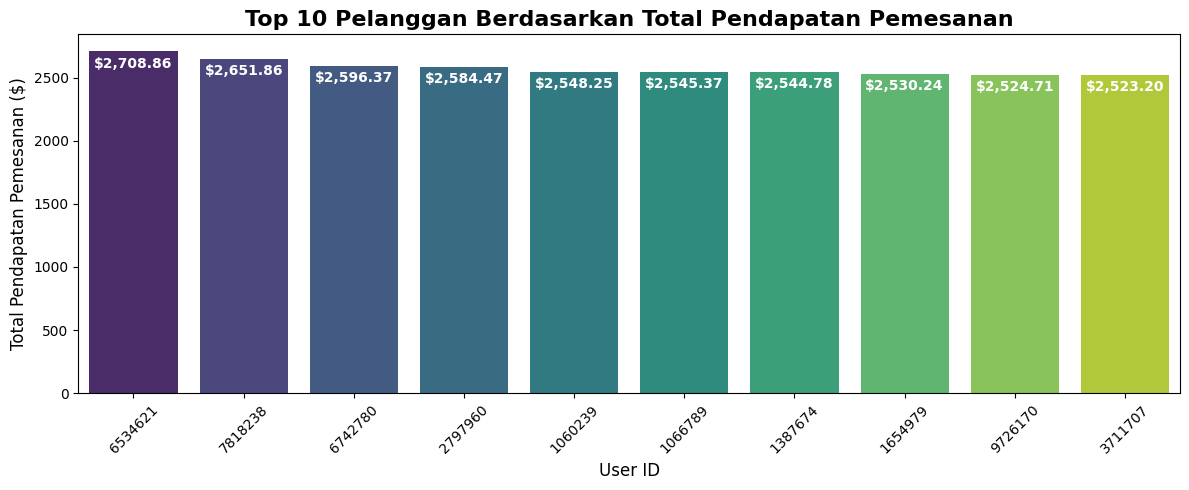

In [ ]:
# Mengurutkan berdasarkan Total Booking Revenue dan memilih 10 pelanggan teratas
top_10_customers = total_booking_revenue.sort_values(by='TOTAL_BOOKING_REVENUE', ascending=False).head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(12, 5))
sns.barplot(
    x='USER_ID',
    y='TOTAL_BOOKING_REVENUE',
    data=top_10_customers,
    palette='viridis',
    order=top_10_customers['USER_ID']  # Memastikan urutan sesuai sorting
)

# Menambahkan jumlah total revenue di atas setiap bar
for index, row in enumerate(top_10_customers.itertuples()):
    plt.text(
        index,  # Posisi horizontal (sumbu x)
        row.TOTAL_BOOKING_REVENUE - (row.TOTAL_BOOKING_REVENUE * 0.05),  # Tepat di atas batang
        f"${row.TOTAL_BOOKING_REVENUE:,.2f}",  # Format angka revenue
        ha='center', fontsize=10, color='white', weight='bold'
    )

# Menambahkan judul dan label
plt.title('Top 10 Pelanggan Berdasarkan Total Pendapatan Pemesanan', fontsize=16, weight='bold')
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Total Pendapatan Pemesanan ($)', fontsize=12)

# Memutar label di sumbu-x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan grafik
plt.tight_layout()
plt.show()

**Penjelasan kode:**

1. **Mengurutkan Data dan Memilih 10 Pelanggan Teratas**:
   - Kode ini mengurutkan data dalam variabel `total_booking_revenue` berdasarkan kolom `TOTAL_BOOKING_REVENUE` secara menurun (`ascending=False`) dan kemudian memilih 10 pelanggan dengan total pendapatan pemesanan tertinggi menggunakan **`.head(10)`**.

2. **Membuat Visualisasi Bar Chart**:
   - `plt.figure(figsize=(12, 5))`: Menentukan ukuran gambar grafik, dengan lebar 12 inci dan tinggi 5 inci.
   - `sns.barplot()`: Fungsi ini digunakan untuk membuat bar chart.
     - `x='USER_ID'`: Menentukan bahwa sumbu X akan berisi ID pengguna (`USER_ID`).
     - `y='TOTAL_BOOKING_REVENUE'`: Menentukan bahwa sumbu Y akan berisi total pendapatan pemesanan untuk setiap pengguna.
     - `data=top_10_customers`: Menyediakan data untuk chart, yang hanya berisi 10 pelanggan teratas.
     - `palette='viridis'`: Mengatur skema warna chart menjadi viridis (skema warna dari biru ke hijau kekuningan).
     - `order=top_10_customers['USER_ID']`: Mengatur urutan batang di chart sesuai dengan urutan data setelah disortir.

3. **Menambahkan Label Jumlah di Atas Setiap Bar**:
   - Looping menggunakan **`enumerate(top_10_customers.itertuples())`** untuk menambahkan label di atas setiap bar.
     - **`plt.text()`** digunakan untuk menambahkan teks di atas setiap batang bar chart.
     - Posisi teks diatur pada koordinat sumbu X sesuai dengan indeks dan posisi vertikal diatur tepat di atas batang menggunakan **`row.TOTAL_BOOKING_REVENUE - (row.TOTAL_BOOKING_REVENUE * 0.05)`** agar teks tidak tumpang tindih dengan batang.
     - Format angka revenue ditampilkan dalam format mata uang **`f"${row.TOTAL_BOOKING_REVENUE:,.2f}"`**.
     - Teks diberi warna putih, ukuran font 10, dan berat font tebal (`weight='bold'`).

4. **Menambahkan Judul dan Label**:
   - **`plt.title()`** menambahkan judul pada grafik: "Top 10 Pelanggan Berdasarkan Total Pendapatan Pemesanan".
   - **`plt.xlabel()` dan `plt.ylabel()`** menambahkan label untuk sumbu X (ID Pengguna) dan sumbu Y (Total Pendapatan Pemesanan dalam USD).

5. **Memutar Label Sumbu-X**:
   - **`plt.xticks(rotation=45)`** digunakan untuk memutar label pada sumbu X sebesar 45 derajat agar lebih mudah dibaca, mengingat labelnya adalah ID pengguna yang panjang.

6. **Memastikan Tata Letak Grafik Tertata Rapi**:
   - **`plt.tight_layout()`** memastikan bahwa grafik dan label tidak tumpang tindih, sehingga tata letaknya menjadi lebih rapi.

7. **Menampilkan Grafik**:
   - **`plt.show()`** digunakan untuk menampilkan grafik tersebut.

---
**Output:**

Grafik tersebut adalah bar chart yang menunjukkan **10 pelanggan teratas berdasarkan total pendapatan pemesanan**. Berikut penjelasan visualisasinya:

1. **Judul**:  
   - Judul grafik menyatakan bahwa ini adalah data **"Top 10 Pelanggan Berdasarkan Total Pendapatan Pemesanan"**.

2. **Sumbu X (Horizontal)**:  
   - Menampilkan **User ID** dari 10 pelanggan dengan total pendapatan pemesanan tertinggi.
   - Setiap User ID terwakili sebagai bar individu dengan label miring (rotated) untuk mempermudah pembacaan.

3. **Sumbu Y (Vertikal)**:  
   - Menunjukkan **Total Pendapatan Pemesanan ($)** dalam satuan dolar.  

   - Sumbu ini menunjukkan skala nilai total pendapatan dari 2.500 hingga sekitar 2.700.

4. **Warna Bar**:  
   - Bar diwarnai dengan gradien warna, mulai dari ungu ke hijau, untuk memberikan visualisasi yang menarik dan menonjolkan perbedaan antar bar.

5. **Label pada Bar**:  
   - Setiap bar memiliki label yang menunjukkan nilai total pendapatan pemesanan secara spesifik (contoh: `$2,708.86` untuk User ID 6534621). Ini membantu pembaca memahami angka dengan jelas tanpa merujuk ke sumbu Y.

**Kesimpulan:**

Grafik ini mengilustrasikan kontribusi signifikan dari pelanggan tertentu (10 besar) terhadap total pendapatan. Meski ada sedikit variasi dalam pendapatan, kesetaraan di antara mereka menunjukkan pentingnya pelanggan-pelanggan ini dalam memberikan pendapatan bagi perusahaan.

##10 Properti Teratas dan Korelasi Antara Tingkat Hunian dan Total Pendapatan per Properti.

In [ ]:
# Menyaring 10 properti teratas berdasarkan OCCUPANCY_RATE dari occupancy_df
top_10_occupancy_rate = occupancy_df.sort_values(by='OCCUPANCY_RATE', ascending=False).head(10)

# Menghitung Occupancy Rate dalam persen
top_10_occupancy_rate['OCCUPANCY_RATE_PERCENT'] = top_10_occupancy_rate['OCCUPANCY_RATE'] * 100

# Visualisasi menggunakan Plotly
fig = px.bar(
    top_10_occupancy_rate,
    x='PROPERTY_CODE',  # X-axis: kode properti
    y='OCCUPANCY_RATE_PERCENT',  # Y-axis: occupancy rate dalam persen
    text='OCCUPANCY_RATE_PERCENT',  # Menampilkan nilai occupancy rate pada setiap batang
    color='OCCUPANCY_RATE_PERCENT',  # Menggunakan warna untuk menggambarkan tingkat occupancy
    color_continuous_scale='Viridis',  # Skala warna untuk representasi yang lebih baik
    title='Top 10 Properties Berdasarkan Occupancy Rate'  # Judul grafik
)

# Menambahkan detail visualisasi
fig.update_traces(
    texttemplate='%{text:.2f}%',  # Format nilai occupancy rate dalam persen
    textposition='outside'  # Posisi teks berada di luar batang
)
fig.update_layout(
    xaxis_title='PROPERTY_CODE',  # Label untuk sumbu X
    yaxis_title='Occupancy Rate (%)',  # Label untuk sumbu Y
    coloraxis_showscale=False,  # Menyembunyikan skala warna di samping grafik
    template='plotly_white'  # Tema visualisasi
)

# Menampilkan grafik
fig.show()

**Penjelasan Kode:**

1. **Menyaring Data Properti Teratas**:
   - Dataframe **`occupancy_df`** disortir berdasarkan **`OCCUPANCY_RATE`** secara menurun (dari tertinggi ke terendah).
   - Hanya 10 properti teratas dengan **`OCCUPANCY_RATE`** tertinggi yang dipilih dan disimpan dalam dataframe **`top_10_occupancy_rate`**.

2. **Konversi Nilai ke Persen**:
   - Nilai **`OCCUPANCY_RATE`** dikonversi ke bentuk persen dengan mengalikannya 100. Kolom baru **`OCCUPANCY_RATE_PERCENT`** dibuat untuk menyimpan hasil konversi.

3. **Visualisasi Bar Chart**:
   - Grafik batang dibuat menggunakan **Plotly** untuk menunjukkan **Occupancy Rate (%)** dari 10 properti dengan nilai tertinggi.
   - Setiap batang diberi warna berdasarkan tingkat **Occupancy Rate**, dengan skala warna **Viridis** untuk menonjolkan variasi tingkat occupancy.

4. **Detail Visualisasi**:
   - **Teks**: Nilai occupancy rate dalam persen ditampilkan di luar batang untuk memperjelas.
   - **Sumbu X**: Menunjukkan kode properti (**PROPERTY_CODE**).
   - **Sumbu Y**: Menunjukkan tingkat **Occupancy Rate (%)**.

5. **Template dan Layout**:
   - Template putih digunakan untuk tampilan yang bersih.
   - Skala warna pada samping grafik disembunyikan untuk fokus pada batang grafik.

---

**Penjelasan Output:**

Grafik menunjukkan **10 properti dengan tingkat Occupancy Rate tertinggi**:
1. Properti **YOG0417** memiliki occupancy rate tertinggi (431.25%), diikuti oleh **SUR0255** (289.18%), dan seterusnya.
2. Properti lain dalam grafik memiliki tingkat occupancy rate yang lebih rendah, hingga properti dengan occupancy rate terendah dalam daftar ini, yaitu **JAK0253** (65.81%).
3. Warna batang menjadi indikator visual untuk perbedaan tingkat occupancy rate, di mana warna cerah menunjukkan nilai lebih tinggi, sementara warna gelap menunjukkan nilai lebih rendah.

In [ ]:
# Menggabungkan data bookings_df dengan property_df berdasarkan 'PROPERTY_CODE'
merged_df = pd.merge(bookings_df, property_df, on="PROPERTY_CODE", how="inner")

# Menghitung Total Revenue per Property
total_revenue_per_property = merged_df.groupby('PROPERTY_CODE')['TOTAL_BOOKING_REVENUE'].sum().reset_index()

# Menghitung Total Room Nights per Property
total_room_nights_per_property = merged_df.groupby('PROPERTY_CODE')['ROOM_NIGHTS'].sum().reset_index()

# Menggabungkan data total revenue dan total room nights
property_data = pd.merge(total_revenue_per_property, total_room_nights_per_property, on="PROPERTY_CODE")

# Menambahkan data Occupancy Rate dari occupancy_df
property_data = pd.merge(property_data, occupancy_df[['PROPERTY_CODE', 'OCCUPANCY_RATE']], on="PROPERTY_CODE", how="left")

# Menyaring baris yang memiliki nilai inf atau NaN
property_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Menghapus baris yang memiliki nilai NaN pada kolom OCCUPANCY_RATE atau TOTAL_BOOKING_REVENUE
property_data_clean = property_data.dropna(subset=['OCCUPANCY_RATE', 'TOTAL_BOOKING_REVENUE'])

# Menghitung korelasi antara Occupancy Rate dan Total Revenue setelah membersihkan data
correlation = property_data_clean['OCCUPANCY_RATE'].corr(property_data_clean['TOTAL_BOOKING_REVENUE'])

# Menampilkan hasil korelasi
print(f'\nNilai Korelasi antara Occupancy Rate dan Total Revenue per Property: {correlation:.4f}\n')

# Visualisasi scatter plot menggunakan Plotly
fig = px.scatter(
    property_data_clean,
    x='OCCUPANCY_RATE',
    y='TOTAL_BOOKING_REVENUE',
    size='ROOM_NIGHTS',
    color='TOTAL_BOOKING_REVENUE',
    labels={'OCCUPANCY_RATE': 'Occupancy Rate', 'TOTAL_BOOKING_REVENUE': 'Total Revenue per Property'},
    title='Korelasi antara Occupancy Rate dan Total Revenue per Property',
    template='plotly_white'
)

# Menambahkan detail pada visualisasi
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis=dict(title='Occupancy Rate', gridcolor='LightGrey'),
    yaxis=dict(title='Total Revenue per Property', gridcolor='LightGrey'),
    coloraxis_colorbar=dict(title="Total Revenue"),
)

# Menampilkan grafik
fig.show()


Nilai Korelasi antara Occupancy Rate dan Total Revenue per Property: 0.0450



**Penjelasan Kode:**

Kode ini bertujuan untuk mengevaluasi hubungan antara tingkat hunian (occupancy rate) dan total pendapatan properti hotel menggunakan data dari beberapa dataframe. Berikut langkah-langkahnya:

1. **Penggabungan Data**:
   - Data dari dataframe `bookings_df` dan `property_df` digabung berdasarkan kode properti (`PROPERTY_CODE`) untuk mendapatkan informasi gabungan seperti pendapatan total dan malam kamar terjual.

2. **Perhitungan Total Revenue dan Room Nights**:
   - Mengelompokkan data berdasarkan `PROPERTY_CODE` untuk menghitung:
     - **Total Revenue per Property**: Jumlah total pendapatan dari pemesanan.
     - **Total Room Nights per Property**: Jumlah malam kamar yang dipesan untuk setiap properti.

3. **Penambahan Data Occupancy Rate**:
   - Menggabungkan data tingkat hunian (`occupancy_df`) dengan data properti sebelumnya.

4. **Pembersihan Data**:
   - Menghilangkan nilai `NaN` atau tidak valid (seperti nilai tak terhingga) pada kolom kunci, terutama `OCCUPANCY_RATE` dan `TOTAL_BOOKING_REVENUE`.

5. **Penghitungan Korelasi**:
   - Menggunakan metode korelasi Pearson untuk menghitung hubungan linear antara `OCCUPANCY_RATE` dan `TOTAL_BOOKING_REVENUE`.

6. **Visualisasi**:
   - Membuat scatter plot menggunakan Plotly dengan sumbu:
     - **X**: Tingkat hunian (Occupancy Rate).
     - **Y**: Total pendapatan properti (Total Revenue).
   - Ukuran gelembung (bubble size) mencerminkan jumlah malam kamar yang terjual, dan warnanya mewakili total pendapatan, dengan gradasi warna (biru ke kuning).

---
**Output:**

1. **Nilai Korelasi**:
   - Nilai korelasi antara tingkat hunian dan total pendapatan properti adalah **0.0450**, yang menunjukkan hubungan yang sangat lemah. Artinya, tidak ada hubungan linear yang signifikan antara kedua variabel ini.

2. **Scatter Plot**:
   - **Distribusi Data**:
     - Sebagian besar titik berada di sebelah kiri (occupancy rate rendah), menunjukkan bahwa sebagian besar properti memiliki tingkat hunian rendah.
   - **Ukuran Gelembung**:
     - Ukuran bervariasi, mencerminkan jumlah malam kamar yang terjual. Properti dengan malam kamar yang lebih banyak memiliki gelembung lebih besar.
   - **Warna**:
     - Warna dari biru ke kuning menggambarkan total pendapatan. Warna kuning lebih sedikit, menunjukkan hanya beberapa properti dengan pendapatan yang sangat tinggi.

Kesimpulannya, meskipun properti dengan tingkat hunian tinggi cenderung menghasilkan pendapatan lebih besar, data ini menunjukkan hubungan yang lemah antara tingkat hunian dan pendapatan total. Hal ini mungkin dipengaruhi oleh faktor lain seperti harga kamar, tipe tamu, atau strategi pemasaran.

#**IMPORT HASIL CLEANING**

In [ ]:
# Menambahkan kolom ke property_df
property_df['OCCUPANCY_RATE'] = occupancy_df['OCCUPANCY_RATE']
property_df['GRADE'] = occupancy_df['GRADE']

# Menyimpan ke dalam satu file Excel dengan sheet yang berbeda
with pd.ExcelWriter('cleaned_reddorz.xlsx', engine='openpyxl') as writer:
    bookings_df.to_excel(writer, sheet_name='Bookings Table', index=False)
    user_df.to_excel(writer, sheet_name='User Table', index=False)
    property_df.to_excel(writer, sheet_name='Property Table', index=False)